In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("aryashah2k/breast-ultrasound-images-dataset")
# path = kagglehub.dataset_download("muratkokludataset/pistachio-image-dataset")

# print("Path to dataset files:", path)

In [43]:
def plot_img(sample):
    # Plot them
    for i, item in enumerate(sample):
        image = item['image']  # 'image' field contains a PIL.Image object
        label = item['label']  # if available
        
        plt.subplot(1, len(sample), i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(str(label))

    plt.tight_layout()
    plt.show()

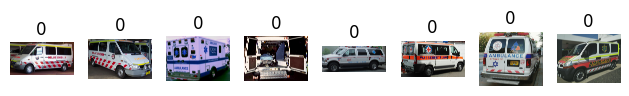

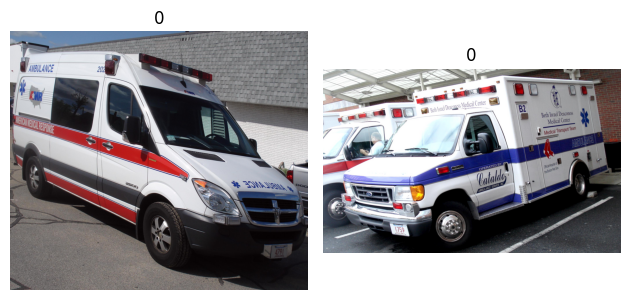

In [44]:
from datasets import load_dataset
from itertools import islice, tee

# Load the streaming dataset
dataset_stream = load_dataset("aryadytm/vehicle-classification", split="train", streaming=True)

# Duplicate the iterator
train_stream, test_stream = tee(dataset_stream, 2)

# Define how many samples for train/test
train_size = 8  # adjust as needed
test_size = 2

# Create train and test samples
train_data = list(islice(train_stream, train_size))
test_data = list(islice(test_stream, train_size, train_size + test_size))

plot_img(train_data)
plot_img(test_data)

In [45]:
# Split train data
X_train = [item['image'] for item in train_data]  # PIL Images
y_train = [item['label'] for item in train_data]

# Split test data
X_test = [item['image'] for item in test_data]
y_test = [item['label'] for item in test_data]

In [54]:
import numpy as np
from PIL import Image

IMG_SIZE = (28, 28)  

# Convert to NumPy array
X_train = np.array([np.array(img.resize(IMG_SIZE)) for img in X_train])

# If grayscale, expand dimensions to add channel
if X_train.ndim == 3:  # (num_samples, height, width)
    X_train = np.expand_dims(X_train, axis=-1)  # → (num_samples, height, width, 1)

# Convert to NumPy array
X_test = np.array([np.array(img.resize(IMG_SIZE)) for img in X_test])

# If grayscale, expand dimensions to add channel
if X_test.ndim == 3:  # (num_samples, height, width)
    X_test = np.expand_dims(X_test, axis=-1)  # → (num_samples, height, width, 1)


In [63]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [65]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense


model = Sequential([
    Input(shape=(28, 28, 3)),  # <-- Use Input() here
    Conv2D(filters=8, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [66]:
from tensorflow.keras.optimizers import RMSprop,Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


In [67]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [68]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [70]:
datagen.fit(X_train)

In [71]:
# Fit the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // batch_size
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 111.4330 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 1.9558e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.000

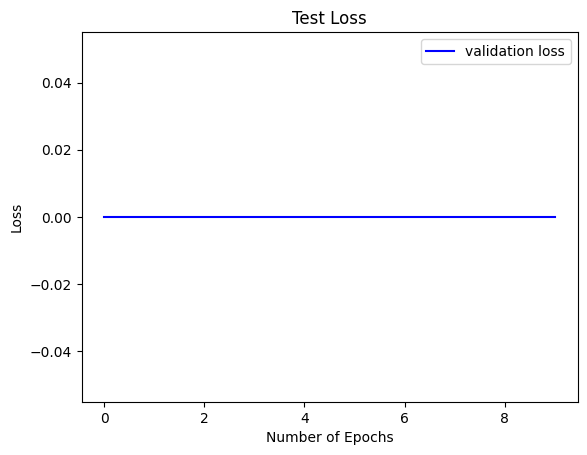

In [72]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()